In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("D:\\Ultimate Programming\\Data Bases\\Student Scores.csv")
df = pd.DataFrame(data)
df.head(5)

,Sl No.,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,05-Oct,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,05-Oct,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,05-Oct,76,78,75


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sl No.               30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [3]:
df.isnull().sum()

Sl No.                    0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [4]:
df["Sl No."].duplicated().sum()

np.int64(29641)

In [5]:
gp_eg = df.groupby("Gender")["Sl No."].count()
gp_eg

Gender
female    15424
male      15217
Name: Sl No., dtype: int64

In [6]:
df["EthnicGroup"] = df["EthnicGroup"].replace(np.nan, "Group x")

In [7]:
gp_eg = df.groupby("EthnicGroup").agg({"Sl No." : "count", "MathScore" : "median"})
gp_eg

,Sl No.,MathScore
EthnicGroup,,
Group x,1840,66.0
group A,2219,63.0
group B,5826,64.0
group C,9212,65.0
group D,7503,68.0
group E,4041,76.0


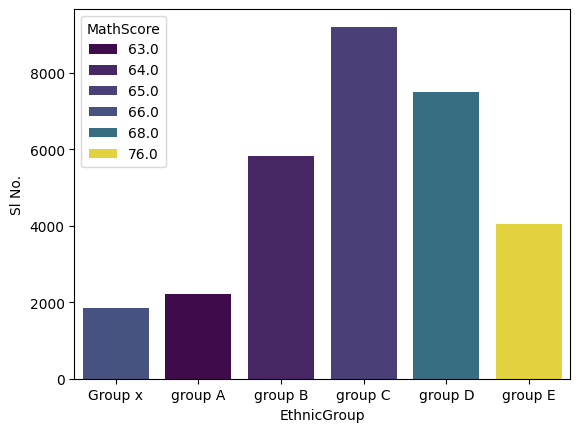

In [8]:
sns.barplot(data = gp_eg, x = "EthnicGroup", y = "Sl No.", hue = "MathScore", palette = "viridis")
plt.show()

In [9]:
gp_eg = df.groupby("EthnicGroup").agg({"ReadingScore" : "median", "WritingScore": "median"})
gp_eg

,ReadingScore,WritingScore
EthnicGroup,,
Group x,69.0,68.0
group A,66.0,65.0
group B,67.0,66.0
group C,69.0,67.0
group D,71.0,71.0
group E,75.0,73.0


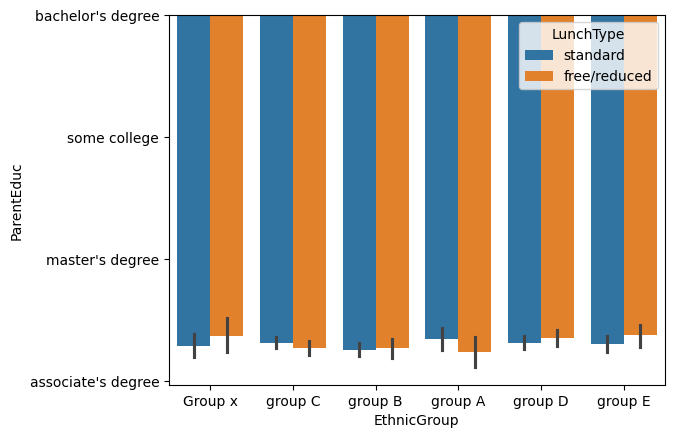

In [27]:
sns.barplot(data =df, x = "EthnicGroup", y = "ParentEduc", hue = "LunchType")
plt.show()

In [13]:
df["NrSiblings"] = df["NrSiblings"].replace(np.nan, df["NrSiblings"].mean())
df["NrSiblings"].isnull().sum()

np.int64(0)

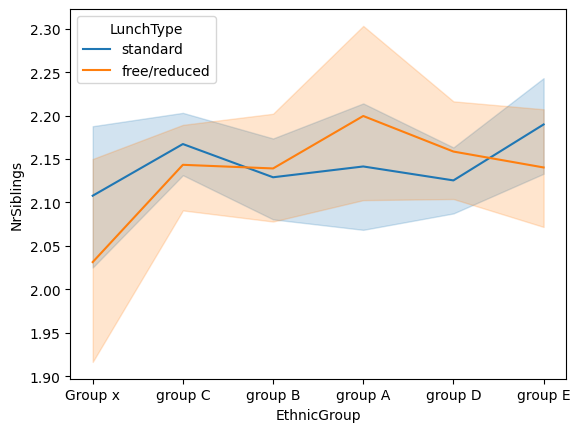

In [17]:
sns.lineplot(data = df, x = "EthnicGroup", y = "NrSiblings", hue = "LunchType")
plt.show()

In [ ]:
plt.violinplot(df["ReadingScore"], showmedians = True)
plt.show()

In [ ]:
gp_lt = df.groupby(df["ParentEduc"])["Sl No."].count()
gp_lt

In [ ]:
ex = [0,0,0,0.1,0,0]
plt.pie(gp_lt.values, labels=gp_lt.index,  autopct="%.2f", explode = ex, shadow = True)
plt.show()

In [ ]:
plt.hist(df["MathScore"], bins = 10, edgecolor="black", color = "red")
plt.show()

In [ ]:
plt.stackplot(df, df["MathScore"],df["ReadingScore"], df["WritingScore"])
plt.show()